In [1]:
import sys
import numpy as np 
import xarray as xr 
import matplotlib.pyplot as plt 
import matplotlib.colors as colors

sys.path.append('../../src/thermal/')

from open import dataset as open_dataset
import plotting as plotting

plt.rcParams['animation.html'] = 'jshtml'


In [80]:
glc1b_x  = np.loadtxt('../../input_data/topography/glc1-b_surf.dat')[:,0]
glc1b_zs = np.loadtxt('../../input_data/topography/glc1-b_surf.dat')[:,1]
glc1b_zb = np.loadtxt('../../input_data/topography/glc1-b_bed.dat' )[:,1]

In [35]:
def vertical_gradient(src, vertical_coord="Z"):
    
    # if ('t' in src.dims) or ('time' in src.dims): 
    #     pass
        
    coord_var = src[vertical_coord].variable
    grad = np.gradient(src.data, 
                       coord_var, 
                       edge_order=2, 
                       axis=src.get_axis_num('coord_2'))
    return grad

In [134]:
with open_dataset('glc1-fetal2011/nc/test.nc') as src: 
# with open_dataset('glc1-fetal2011/nc/glc1-fetal2011_dx_50_NT_200_dt_1.0_MB_-1.0_Tma_-7.0_prog_rhomax_volbelowsurf.nc') as src: 
    src = src

(2600.0, 3000.0)

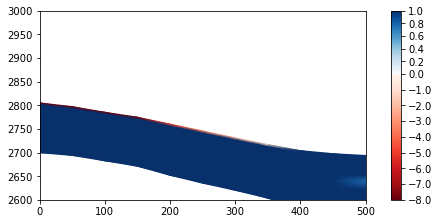

In [135]:
fig, ax, cb = plotting.enthalpy_pcolormesh(src, 0, W_max=1);

ax.set_xlim(0, 500)
ax.set_ylim(2600, 3000)
# ax.plot(glc1b_x[::-1], glc1b_zb)

In [136]:
ani = plotting.animate_enthalpy(src, i_0=0, i_s=1, interval=150); 
plt.close()

In [137]:
ani

In [109]:
# ani.save('WFM_ref_params_accumzone_cooling.mp4', dpi=600, bitrate=4e3)

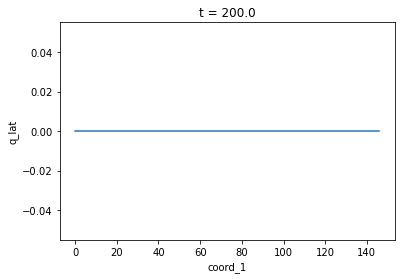

In [110]:
(src['q_lat'] /1e3) .isel(coord_2=-2, t=-1).plot()

In [ ]:
with xr.open_dataset('glc1-a/nc/glc1-a_dx_50_NT_1000_dt_1.0_MB_-1.225_OFF_Tma_-7.00_vol_prog_rho_kappa_gridded.nc') as src: 
    src = src.isel(heat_source=0, Delta_MB=0, dt=0, T_ma=0)

fig, ax = plt.subplots(1,1,constrained_layout=True) 

# divnorm = colors.TwoSlopeNorm(vmin=-8., vcenter=0, vmax=1)
midnorm = plotting.EnthalpyNormalizer(T_min=-8, W_max=1, vcenter=0.0, ncenter=2/3)
my_cmap = plotting.custom_RdBu(midnorm) 
# https://matplotlib.org/stable/tutorials/colors/colormapnorms.html#twoslopenorm-different-mapping-on-either-side-of-a-center
# https://matplotlib.org/stable/gallery/scales/custom_scale.html


im = ax.pcolormesh(src.X[:,::-1], 
                   src.Z.isel(t=-1), 
                   xr.where(src.enthalpy_h >= src['phase change enthalpy'], 
                   src['water content']*100, src['temperature']).isel(t=-1), 
                   shading='gouraud', norm=midnorm, cmap=my_cmap) 


ax.contour(src.X[:,::-1], 
           src.Z.isel(t=-1), 
           (src['water content']*100).isel(t=-1), 
           colors='k', linewidths=0.75)


ax.set_xlim(None, 5.5e3)
ax.set_ylim(1900, None)


ratio = 1/2
xleft, xright = ax.get_xlim()
ybottom, ytop = ax.get_ylim()
ax.set_aspect(abs((xright-xleft)/(ybottom-ytop))*ratio)

cb = fig.colorbar(im, shrink=ratio*1.2)
cb.set_ticks(np.concatenate((np.linspace(-8, 0, 9), 
                             np.linspace(0.2, 1.0, 5))))



In [ ]:
ani = plotting.animate_enthalpy(src, i_s=1, i_f=20, interval=150); 
plt.close()

In [ ]:
ani.save('test.mp4', dpi=600, bitrate=4e3)

In [ ]:
fig, ax = plt.subplots(1,1) 

im = ax.pcolormesh(src.X[:,::-1], 
                   src.Z.isel(t=-1), 
                   (src.isel(t=-1).enthalpy_h/1e3).groupby('coord_1').map(vertical_gradient), 
                   shading='gouraud', 
                   cmap='RdBu', 
                   vmin=-0.5, vmax=0.5) 

plt.colorbar(im, extend='both')


In [ ]:
plt.rcParams['animation.bitrate']

In [ ]:
test = src.enthalpy_h.groupby('coord_1')[0]

In [ ]:
def vertical_gradient(src, vertical_coord="Z"):
    coord_var = src['Z'].variable
    grad = np.gradient(src.data, coord_var, edge_order=2)
    return grad

In [ ]:
dim = coord_var.dims[0]

In [ ]:
np.gradient(test.data, 
            coord_var, 
            edge_order=1)

In [ ]:
test.data

In [ ]:
dim = coord_var.dims[0]

In [ ]:
test.dims